Import Dataset

In [ ]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import pathlib
img_width, img_height = 224, 224

Classification

In [ ]:
train_data_dir ="D:\Dataset\Train set"
validation_data_dir ="D:\Dataset\Test set"
medicinal="D:\Dataset\Train set\Medicinal plants"
poisonous="D:\Dataset\Train set\Poisonous plants"
nb_train_samples=150
nb_validation_samples =50
epochs = 1
batch_size = 50
root=pathlib.Path(train_data_dir)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print("Overall Classification:")
print(classes)
print("\n")
root1=pathlib.Path(medicinal)
classes1=sorted([j.name.split('/')[-1] for j in root1.iterdir()])
print("Medicinal plants classification:")
print(classes1)
print("\n")
root2=pathlib.Path(poisonous)
classes2=sorted([j.name.split('/')[-1] for j in root2.iterdir()])
print("Poisonous plants classification:")
print(classes2)

Overall Classification:
['Medicinal plants', 'Poisonous plants']


Medicinal plants classification:
['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


Poisonous plants classification:
['Castor bean', 'Common oleander', 'Daffodil', 'Foxglove', 'Giant hogweed', 'Jimson weed', 'Poison Hemlock', 'Rhododendron', 'White snakeroot', 'Yew']


In [ ]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

Modeling

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples / batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples / batch_size)

Found 4936 images belonging to 2 classes.
Found 1130 images belonging to 2 classes.


C:\Users\Franclin E\AppData\Local\Temp\ipykernel_11080\3701808709.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


3/3 [==============================] - 13s 4s/step - loss: 0.6018 - accuracy: 0.7400 - val_loss: 0.3147 - val_accuracy: 0.9800


In [ ]:
model.save_weights('model_saved.h5')

Image Resizing

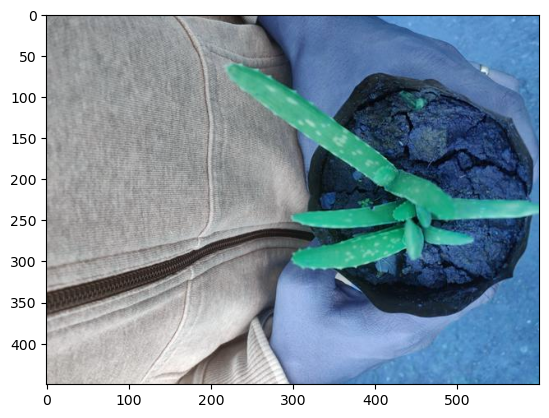

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(r"D:\\Dataset\\Test set\\Medicinal plants\\Aloevera\\4341.jpg")
plt.imshow(img)
plt.show()

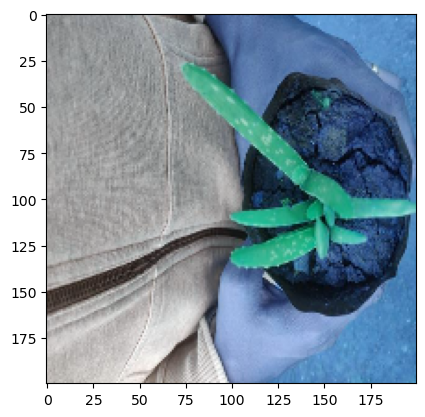

In [ ]:
resize = tf.image.resize(img, (200,200))
plt.imshow(resize.numpy().astype(int))
plt.show()

Prediction

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import math
dir_path="D:\\Dataset\\Test set\\Medicinal plants\\Aloevera\\4350.jpg"
image = load_img(dir_path, target_size=(224, 224))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,224,224,3)
label = model.predict(img)
a=label[0][0]*100000
print(a)
if a>=0.044:
    print("Predicted as Medicinal plant")
else:
    print("Predicted as Non-Medicinal plant")

1/1 [==============================] - 0s 81ms/step
0.09643160865380196
Predicted as Medicinal plant
